In [74]:
def extracting_training_test_data(data_path):
    from pandas import read_csv
    
    train_path= data_path+ "train.csv"
    test_path= data_path+ "test.csv"
    train= read_csv(train_path)
    test= read_csv(test_path)
    features= list(train.iloc[51695, :].values)
    train= train.drop([51695], axis= 0)
    train.columns= features
    features.remove("target")
    test.columns= features
    return(train, test)

In [75]:
%%capture
data_path= "../data_path/"
train, test= extracting_training_test_data(data_path)

In [76]:
train.iloc[:, -1].unique()

array(['Class_2', 'Class_8', 'Class_6', 'Class_3', 'Class_7', 'Class_4',
       'Class_5', 'Class_9', 'Class_1'], dtype=object)

In [77]:
# it's easy enough to encode the classes without an extra module
train['target'] = [x[-1] for x in train['target']]
train['target'] = train['target'].astype(int) - 1
train.target.unique()

array([1, 7, 5, 2, 6, 3, 4, 8, 0])

In [44]:
from sklearn.model_selection import train_test_split
# slice features and classes from df
X = train.iloc[:, 1:94].values.astype(float)
y = train.iloc[:, 94].values.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
from sklearn.preprocessing import StandardScaler

# scale features
sc = StandardScaler()
X = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 200, input_dim = 93))
    classifier.add(Dense(units = 50))
    classifier.add(Dense(units = 9, activation = 'softmax'))
    classifier.compile(optimizer = 'sgd', 
                       loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [90]:
classifier = classifier()
history = classifier.fit(X_train, y_train, 
                         validation_data=(X_test,y_test), 
                         epochs=10, batch_size=1000)

Epoch 1/10
50/50 [==============================] - 7s 9ms/step - loss: 2.0707 - accuracy: 0.3390 - val_loss: 1.2668 - val_accuracy: 0.6197
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 1.1840 - accuracy: 0.6401 - val_loss: 1.0421 - val_accuracy: 0.6747
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 1.0066 - accuracy: 0.6845 - val_loss: 0.9469 - val_accuracy: 0.6940
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.9132 - accuracy: 0.7051 - val_loss: 0.8929 - val_accuracy: 0.7057
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.8674 - accuracy: 0.7139 - val_loss: 0.8569 - val_accuracy: 0.7142
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8399 - accuracy: 0.7167 - val_loss: 0.8308 - val_accuracy: 0.7198
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.8071 - accuracy: 0.7219 - val_loss: 0.8107 - val_accuracy: 0.7212
Epoch 8/10
50/50 [==

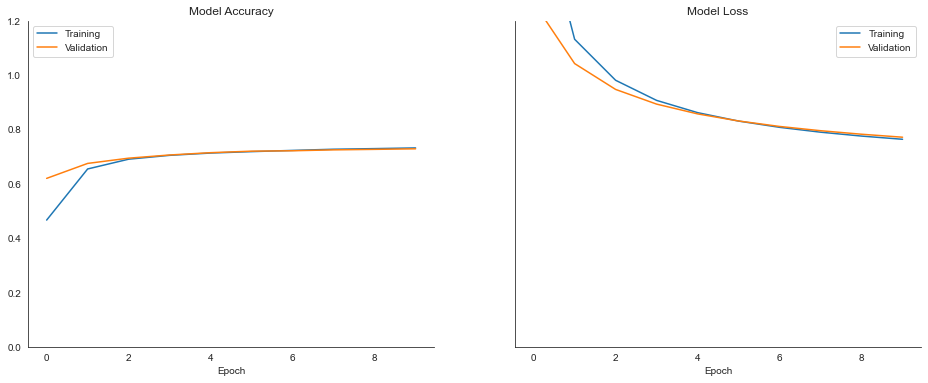

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plots(acc, val_acc, loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

    # plot accuracy
    ax1.plot(acc, label='Training')
    if val_acc is not None:
        ax1.plot(val_acc, label='Validation')

    ax1.set_xlabel('Epoch')
    ax1.set_title('Model Accuracy')
    ax1.legend(loc='upper left')
    ax1.set_ylim([0,1.2])

    # plot loss
    ax2.plot(loss, label='Training')
    if val_loss is not None:
        ax2.plot(val_loss, label='Validation')

    ax2.set_xlabel('Epoch')
    ax2.set_title('Model Loss')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0,1.2])

    sns.despine()
    sns.set_style("white")


    plt.show()

plt.rcParams["figure.figsize"] = (16,6)
plots(history.history["accuracy"],history.history['val_accuracy'],
      history.history["loss"],history.history['val_loss'])

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 200, input_dim = 93))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 50))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 9, activation = 'softmax'))
    classifier.compile(optimizer = 'sgd', 
                       loss = 'sparse_categorical_crossentropy', 
                       metrics = ['accuracy'])
    return classifier

classifier = classifier()
history = classifier.fit(X_train, y_train, 
                         validation_data=(X_test,y_test), 
                         epochs=10, batch_size=1000)

Epoch 1/10
50/50 [==============================] - 1s 9ms/step - loss: 2.2095 - accuracy: 0.2796 - val_loss: 1.3212 - val_accuracy: 0.6182
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 1.2439 - accuracy: 0.6377 - val_loss: 1.0857 - val_accuracy: 0.6822
Epoch 3/10
50/50 [==============================] - 0s 5ms/step - loss: 1.0551 - accuracy: 0.6848 - val_loss: 0.9826 - val_accuracy: 0.7008
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 0.9625 - accuracy: 0.7005 - val_loss: 0.9226 - val_accuracy: 0.7094
Epoch 5/10
50/50 [==============================] - 0s 5ms/step - loss: 0.9072 - accuracy: 0.7147 - val_loss: 0.8828 - val_accuracy: 0.7149
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.8636 - accuracy: 0.7203 - val_loss: 0.8541 - val_accuracy: 0.7192
Epoch 7/10
50/50 [==============================] - 0s 5ms/step - loss: 0.8348 - accuracy: 0.7227 - val_loss: 0.8321 - val_accuracy: 0.7224
Epoch 8/10
50/50 [==

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 200, kernel_initializer = 'uniform', 
                         activation = 'relu', input_dim = 93))
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', 
                         activation = 'relu'))
    classifier.add(Dense(units = 9, kernel_initializer = 'uniform', 
                         activation = 'softmax'))
    classifier.compile(optimizer = 'rmsprop', 
                       loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [81]:
classifier = classifier()
history = classifier.fit(X_train, y_train, 
                         validation_data=(X_test,y_test), 
                         epochs=10, batch_size=1000)

Epoch 1/10
50/50 [==============================] - 1s 6ms/step - loss: 1.6801 - accuracy: 0.5262 - val_loss: 0.9043 - val_accuracy: 0.6745
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.8347 - accuracy: 0.7066 - val_loss: 0.7004 - val_accuracy: 0.7418
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.7482 - val_loss: 0.6336 - val_accuracy: 0.7548
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.6239 - accuracy: 0.7624 - val_loss: 0.6061 - val_accuracy: 0.7667
Epoch 5/10
50/50 [==============================] - 0s 5ms/step - loss: 0.5948 - accuracy: 0.7708 - val_loss: 0.5899 - val_accuracy: 0.7669
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5695 - accuracy: 0.7770 - val_loss: 0.5792 - val_accuracy: 0.7740
Epoch 7/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5609 - accuracy: 0.7801 - val_loss: 0.5796 - val_accuracy: 0.7696
Epoch 8/10
50/50 [==

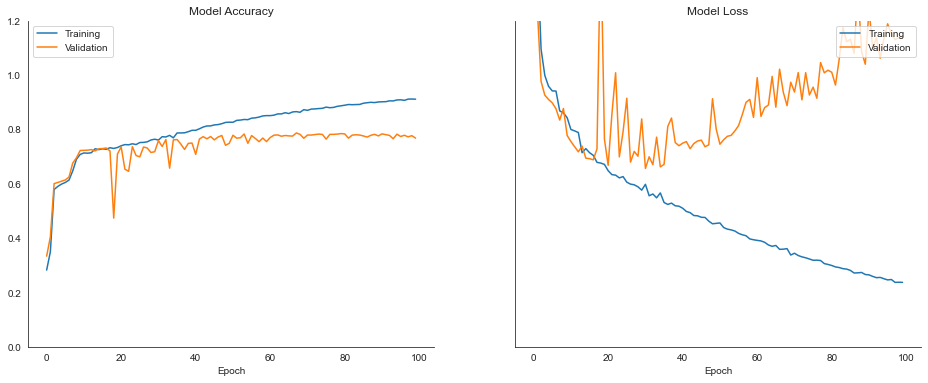

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plots(acc, val_acc, loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

    # plot accuracy
    ax1.plot(acc, label='Training')
    if val_acc is not None:
        ax1.plot(val_acc, label='Validation')

    ax1.set_xlabel('Epoch')
    ax1.set_title('Model Accuracy')
    ax1.legend(loc='upper left')
    ax1.set_ylim([0,1.2])

    # plot loss
    ax2.plot(loss, label='Training')
    if val_loss is not None:
        ax2.plot(val_loss, label='Validation')

    ax2.set_xlabel('Epoch')
    ax2.set_title('Model Loss')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0,1.2])

    sns.despine()
    sns.set_style("white")


    plt.show()

plt.rcParams["figure.figsize"] = (16,6)
plots(history.history["accuracy"],history.history['val_accuracy'],
      history.history["loss"],history.history['val_loss'])

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'relu', input_dim = 93))
    classifier.add(Dense(units = 175, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 75, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [113]:
from keras.callbacks import EarlyStopping

classifier_es = classifier()
early_stop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

history_es = classifier_es.fit(X_train, y_train, validation_data=(X_test,y_test), 
                               epochs=100, batch_size=1000, callbacks=[early_stop])

Epoch 1/100
50/50 [==============================] - 2s 19ms/step - loss: 1.8078 - accuracy: 0.2945 - val_loss: 1.0718 - val_accuracy: 0.6214
Epoch 2/100
50/50 [==============================] - 0s 7ms/step - loss: 0.9808 - accuracy: 0.6415 - val_loss: 0.8453 - val_accuracy: 0.6867
Epoch 3/100
50/50 [==============================] - 0s 7ms/step - loss: 0.8089 - accuracy: 0.6974 - val_loss: 0.8172 - val_accuracy: 0.6966
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 0.7523 - accuracy: 0.7064 - val_loss: 0.7296 - val_accuracy: 0.7153
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 0.7199 - accuracy: 0.7172 - val_loss: 0.7689 - val_accuracy: 0.7119
Epoch 6/100
50/50 [==============================] - 0s 7ms/step - loss: 0.7014 - accuracy: 0.7236 - val_loss: 0.7201 - val_accuracy: 0.7222
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 0.6815 - accuracy: 0.7305 - val_loss: 0.7319 - val_accuracy: 0.7196
Epoch 8/100


In [64]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

# build estimator, making model compatible with sklearn modules
estimator = KerasClassifier(build_fn=classifier, epochs=5, batch_size=1000, verbose=0)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
%time results = cross_val_score(estimator, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

CPU times: user 40 s, sys: 13.7 s, total: 53.6 s
Wall time: 13.8 s
Accuracy: 57.79% (14.78%)


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(3, input_shape=(3,), activation="relu"))
model.add(Dense(1))

In [110]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 3)                 12        
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.count_params()

16